In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Fukncia kt pokial nema dane cislo v poli prida
def differentFormats(array_of_current, len_of_format):
    for current_format in array_of_current:
        if current_format == len_of_format:
            return
    array_of_current.append(len_of_format)
    return

In [4]:
other_data = pd.read_csv("data/modify_other_train.csv",index_col=0)
person_data = pd.read_csv("data/personal_train.csv",index_col=0)

# Zadanie
Nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)  
Duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami  
Nejednotné formáty dát  
Chýbajúce hodnoty  
Vychýlené (odľahlé) hodnoty  a ďalšie, t. j. v dátach sa môžu nachádzať aj iné, tu nevymenované problémy, ktoré tiež treba identifikovať a vo vašej analýze adresovať.  

## Subor personal.csv

    - tento subor obsahuje rozne chyby ako nejednotne formaty datum narodenia, alebo neobsahuje vek
    - oba tieto problemy sa daju riesit. Pri datum si vyberieme nejaky format a nasledne vsetky don prevedieme 
        tie, ktore sa nebudu dat budeme musiet rucne alebo ich zvolime ako nezname
    - pokial budeme opravovat formaty datum vieme automaticky opravovat aj vek ci uz len kontrolovat alebo aj doplnat

10

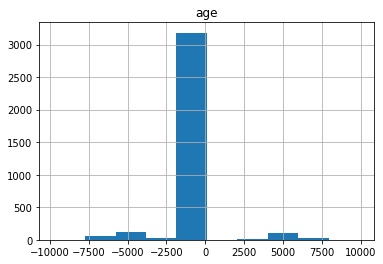

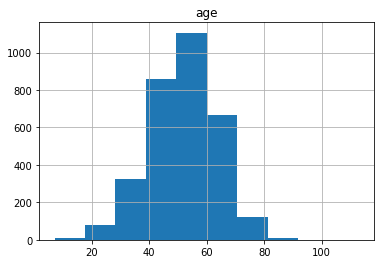

In [17]:
# age
# Vidime ze hodnoty mensie ako 0 a vacse ako 150 (pretoze ziaden clovek nezije viac ako 150 rokov)
# samotna nemaju zmysel kedze hovorime o veku
person_data.hist('age')

(person_data.loc[person_data['age'] > 0].loc[person_data['age'] < 150]).hist('age')
# Tieto hodnoty (pod 0 a nad 150) bude treba upravit

In [36]:
# date_of_birth
# pri datume narodeni vidime ze hodnoty nechybaju ale maju nekonzistentny format
person_data['date_of_birth'].value_counts()

counter_of_different_format = []
null_data = itertools.count(0)
person_data.date_of_birth.apply(lambda x: differentFormats(counter_of_different_format,len(x.__str__())) if len(x.__str__()) > 1 else null_data.__next__())
print("Different format size in data ",len(counter_of_different_format))
print("Countof null data",null_data)

Different format size in data  3
Count of null data count(0)


## Subor other.csv
   - obsahuje nekonzistentny format ci je pacient tehotny teda toto zmenime na "False" "True" podla hodnoty      
   - occupation, country, workclass ako nezname nebudeme menit (?)
   - pricom workclass pokial nebude nic obsahovat tak vlozime "?"
   - co sa tyka stlpca medical_info pokial tento stlpec nebude nic obsahovat vlozime donho json s nulovymi hodnotami
   - udaje ktore su v medical_info budeme parsovat z JSONU na dict ten nasledne pozbierame a vytvorime z neho DataFrame,
        ktory nasledne vlozime do povodnych dat a ulozime. Pred tym ale budeme musiet jednotlive hodnoty parsnut na float numpy
   - tento bod sme uz museli vykonvat aby sa nam lahsie spracovala prva uloha a dalej vedeli pouzivat data a postupovat v zadani
   - spajat udaje s personal.csv budeme pomocou mena a priezviska kedze nevieme ci id su v rovnakych poradiach
   - vychylene hodnoty po identifikovani vyhodime z datasetu no len v danej ulohe, hlavne tam kde to bude potrebne, pre istotu ze ine vysledky budu spravne
   - pokial pacient nema rasu tam vlozime other alebo ? ako unknown nech nam to neznehodnoti statistiky
    

In [49]:
# pregnant
# vidime ze su rozne hodnoty pravdy a nepravdy
print(other_data.pregnant.value_counts())

f        3494
F         202
FALSE     182
t          72
TRUE        6
T           5
Name: pregnant, dtype: int64


In [55]:

# marital-status
# vidime ze hodnoty marital-status su v poriadku
print(other_data['marital-status'].value_counts())


 Married-civ-spouse       1830
 Never-married            1310
 Divorced                  511
 Widowed                   138
 Separated                 132
 Married-spouse-absent      44
Name: marital-status, dtype: int64


In [53]:
# occupation
# pocet prazdnych hodnot
counter = itertools.count(0)
other_data.occupation.apply(lambda x: counter if isinstance(x, str) and x.find("?") == -1 else counter.__next__())
print("Occupation" ,counter, "of null values")

# native-country
# pocet prazdnych hodnot
counter = itertools.count(0)
other_data['native-country'].apply(lambda x: counter if isinstance(x, str) and x.find("?") == -1 else counter.__next__())
print("Native-country",counter, "of null values")

# workclass
# pocet prazdnych hodnot
counter = itertools.count(0)
other_data.workclass.apply(lambda x: counter if isinstance(x, str) and x.find("?") == -1 else counter.__next__())
print("Workclass", counter, "of null values")

# rase
# pocet prazdnych hodnot
counter = itertools.count(0)
other_data.race.apply(lambda x: counter if isinstance(x, str) and x.find("?") == -1 else counter.__next__())
print("Race", counter, "of null values")

Occupation count(252) of null values
Native-country count(78) of null values
Workclass count(617) of null values
Race count(13) of null values


In [54]:
# Pacienti u ktorych nie je definovane ci chorobu maju alebo nie 
print(len(other_data.loc[other_data['class'] != 1].loc[other_data['class'] != 0]))

17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3187574a8>]],
      dtype=object)

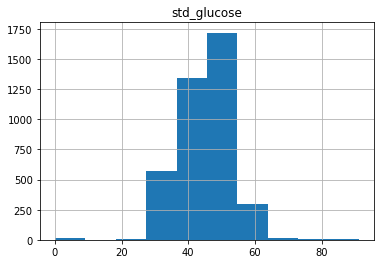

In [52]:
# std_glucose
# skoro vsetky hodnoty su okolo 30 do 70 ale vidime male hodnoty, kt su od 0 po 20 alebo od 70 do 80
# takze mozme vidiet malych outsiderov
other_data.hist('std_glucose')

# u inych neboli skoro vobec identifikvany outsidery (vdaka hist grafov v Zakladnom opise)